### First we will load in joint position data from Monkey R and N. Preprocessed waveforms are shown with angle values at stimulations marked by a red dot. Next we fit an exponential decay curve to both of these max angle values

Extracted data from /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueECRB12_6_20DLC_resnet50_FESFatigueMay31shuffle1_355000.csv


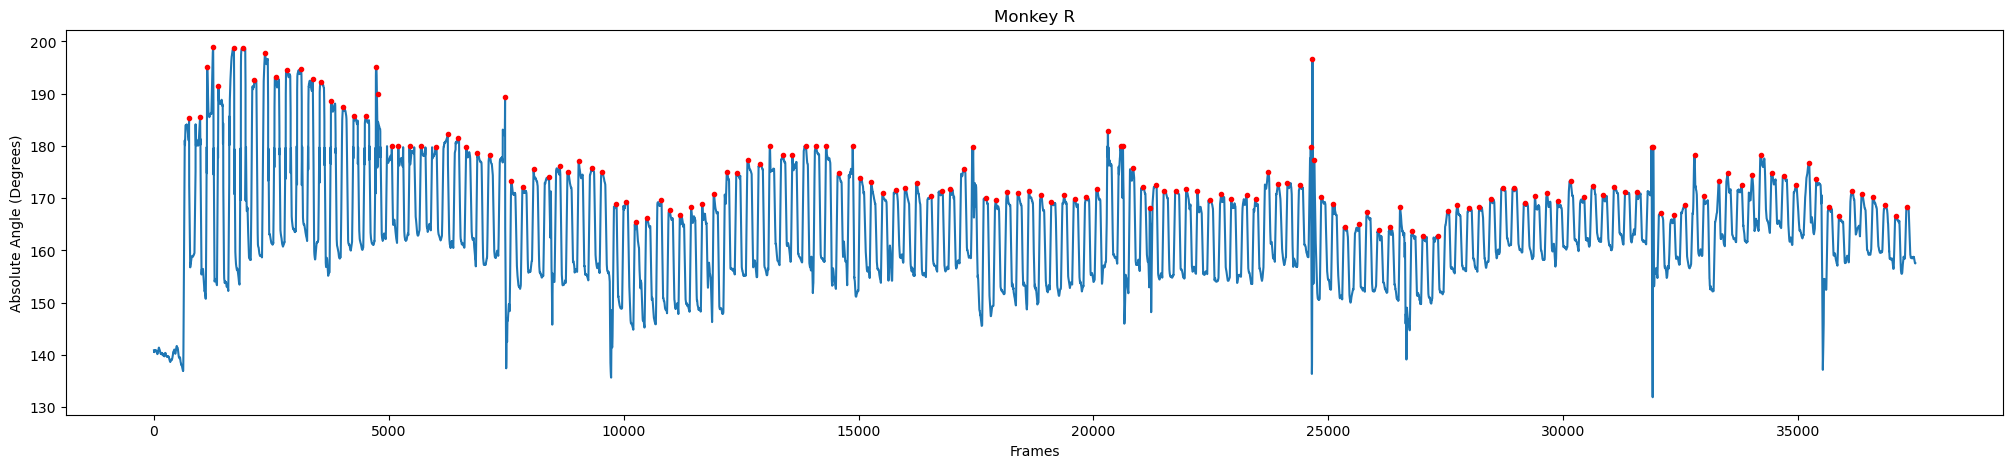

Extracted data from /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/napierecrbfatigue_05_31_3_1DLC_resnet50_FESFatigueMay31shuffle1_37000.csv


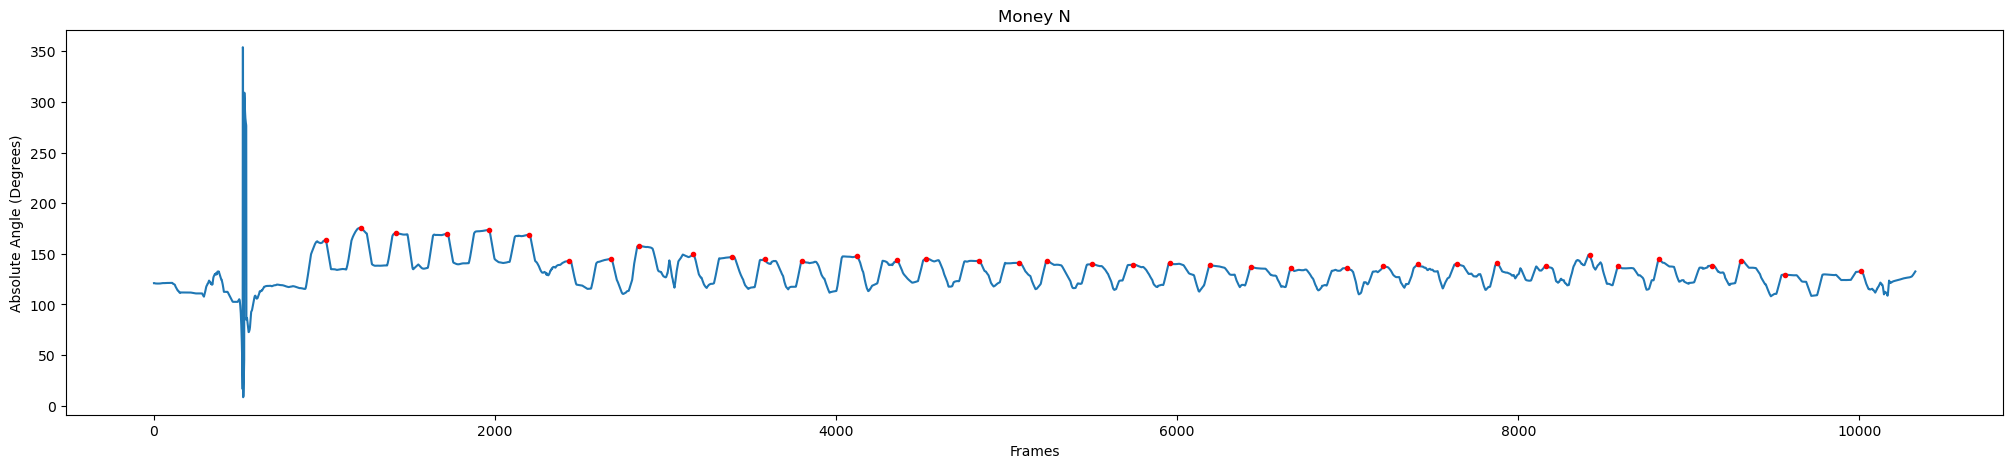

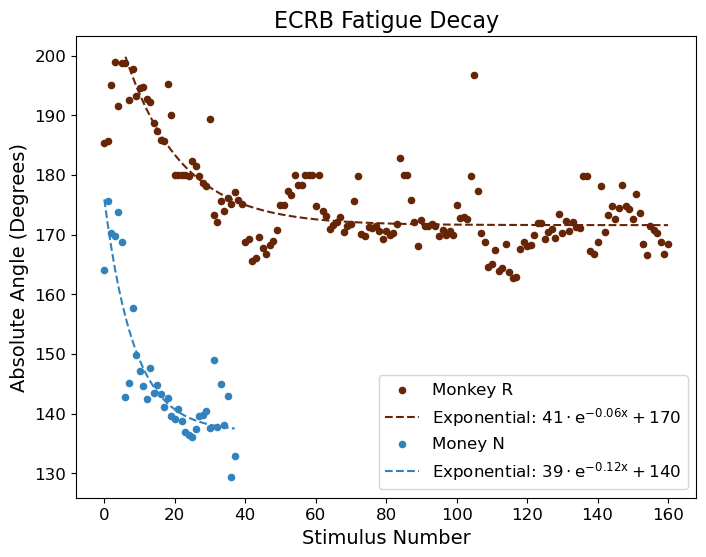

In [23]:
import sys
sys.path.append('/home/jakejoseph/Desktop/Joseph_Code/stim_behavior')
from scripts.dataLoader import FatigueAnalysis, plotDecay

# TODO: Change the path to the CSV file, use a config file to store the path
rhodes = FatigueAnalysis('Monkey R','/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueECRB12_6_20DLC_resnet50_FESFatigueMay31shuffle1_355000.csv',threshold=0.99, window=30,distance=5,prominence=8)
napier = FatigueAnalysis("Money N","/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/napierecrbfatigue_05_31_3_1DLC_resnet50_FESFatigueMay31shuffle1_37000.csv", threshold=0.5, window=30, height=100, prominence=8, width=100, distance =5)

guess = [2,2,160]
rhodes.fitExponentialDecay(guess, removeStartSlice=6) #Not including the first 6 stims in the fit due to "Warming Up" period
napier.fitExponentialDecay(guess)
plotDecay(rhodes, napier)

### Selected stim profiles for each Monkey, red line corresponds to 180. For the final figure, an extra gaussian smoothing of 10 was added

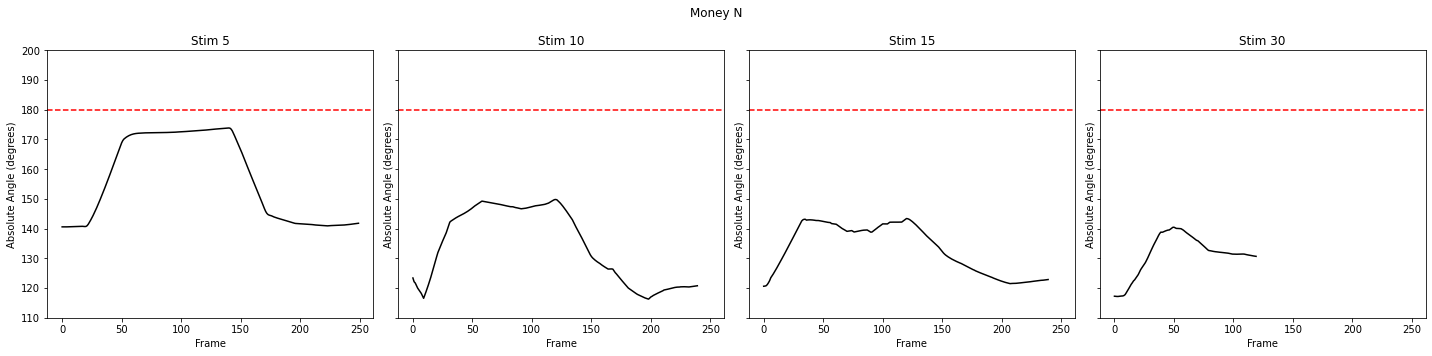

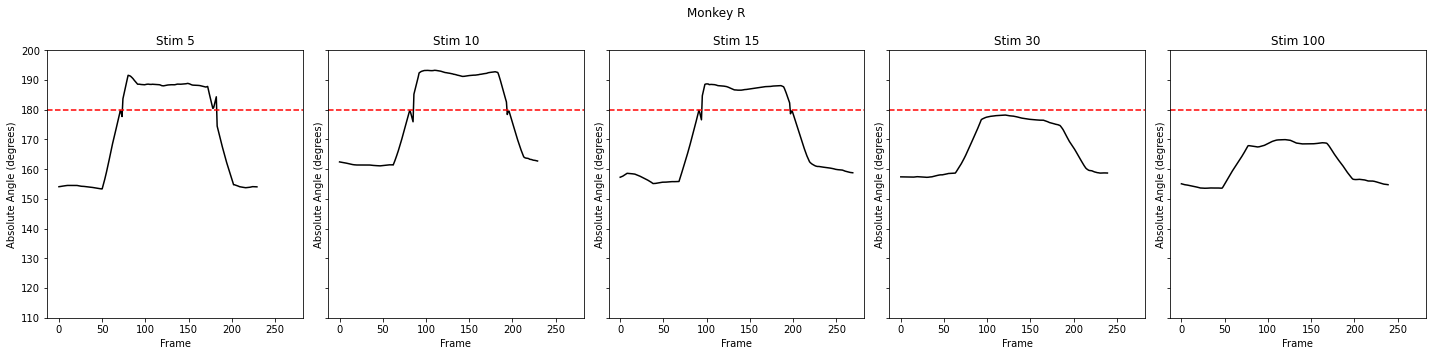

In [2]:
napier.stimProfiles([4,9,14,29], [110,120,120,70], [140,120,120,50])
rhodes.stimProfiles([4,9,14,29, 99], [150,120,170,120,120], [80,110,100,120,120])

### The following was used to create video clips and text for the supplemental figure

In [166]:
# #Napier
stimuli = [0,19,29]
lengths = [120,120, 80]
starts = [120, 140, 40]
for i, (stim, length, start) in enumerate(zip(stimuli, lengths, starts)):
    napier.makeVideo('/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/napierecrbfatigue_05_31_3_1.mp4', f'/home/jakejoseph/Desktop/Joseph_Code/FES_VideoClips/napierClip{napier.filtered_indices[stim]+1}.mp4', stim, start, length)
#Rhodes
stimuli = [0,19,99]
lengths = [50,120, 100] 
starts = [150, 120, 120]
for i, (stim, length, start) in enumerate(zip(stimuli, lengths, starts)):
    rhodes.makeVideo('/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueECRB12_6_20.mp4', f'/home/jakejoseph/Desktop/Joseph_Code/FES_VideoClips/rhodesClip{rhodes.filtered_indices[stim]+1}.mp4', stim, start, length)

In [28]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
fig.patch.set_facecolor('black')  # Set the background color to black
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplots to remove borders

# Add text to the figure
text = 'ECRB motor point FES elicits\n less fatigue'
fig.text(0.5, 0.5, text, ha='center', va='center', fontsize=50, weight='bold', color='w')

# Hide axes
ax.axis('off')

# Save the figure
plt.savefig("rhodesVid.png", bbox_inches='tight', pad_inches=0, facecolor=fig.get_facecolor())
plt.close(fig)